# Gestión de Nulos

* Continua de 07 y 09, se limpia y luego se gestiona nulos.


* Tipo de nulos, importancia de su gestión, razones x las que apàrecen y principales estrategias para gestionarlos.
* Tratamiento de valores nulos en columnas categóricas.
* Tratamiento de valores nulos en columnas numéricas.


### Tipos

- NaN (el más común, valor faltante o no valido en fila o columna, del tipo flow)


- None (objeto de python, non time, para representar ausencia de valor en objeto no numérico)


- Valores de texto: "n/a", "Nan", "nan", "null" (strings)


- Valores numéricos especiales: 9999999 o 000000 (o en falta de datos numericos o imcompletos)


- Nat (en fecha date-time)



### Metodos de imputación o tecnicas de gestión

- drop  dropna

- fillna (rellena nulos con valores estadísticos)


In [1]:
import pandas as pd; pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Data/online_sales_nulos.csv', parse_dates=['Invoice_Date', 'Date', 'Hour'])
df.head()

C:\Users\Nacho\AppData\Local\Temp\ipykernel_18268\3281060151.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Data/online_sales_nulos.csv', parse_dates=['Invoice_Date', 'Date', 'Hour'])


,Invoice_No,Stock_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_Id,Country,Discount,Payment_Method,Shipping_Cost,Category,Sales_Channel,Return_Status,Shipment_Provider,Warehouse_Location,Order_Priority,Year,Month,Day_Week,Week,Quarter,Invoice_Date_str,Date,Hour,Shipping_Cost_Category
0,221958,sku_1964,white mug,38.0,2020-01-01 00:00:00,1.71,37039.0,australia,0.47,bank transfer,10.79,apparel,in-store,not returned,ups,london,medium,2020,January,wednesday,1,1,2020-01-01 00:00:00,2020-01-01,2025-06-09 00:00:00,low
1,771155,sku_1241,white mug,18.0,2020-01-01 01:00:00,41.25,19144.0,spain,0.19,paypal,9.51,electronics,online,not returned,ups,rome,medium,2020,January,wednesday,1,1,2020-01-01 01:00:00,2020-01-01,2025-06-09 01:00:00,low
2,231932,sku_1501,headphones,49.0,2020-01-01 02:00:00,29.11,50472.0,germany,0.35,bank transfer,23.03,electronics,online,returned,ups,berlin,high,2020,January,wednesday,1,1,2020-01-01 02:00:00,2020-01-01,2025-06-09 02:00:00,high
3,465838,sku_1760,desk lamp,14.0,2020-01-01 03:00:00,76.68,96586.0,netherlands,0.14,paypal,11.08,accessories,online,not returned,royal mail,rome,low,2020,January,wednesday,1,1,2020-01-01 03:00:00,2020-01-01,2025-06-09 03:00:00,low
4,359178,sku_1386,usb cable,NaN,2020-01-01 04:00:00,NaN,NaN,united kingdom,NaN,bank transfer,NaN,electronics,in-store,not returned,fedex,NaN,medium,2020,January,wednesday,1,1,2020-01-01 04:00:00,2020-01-01,2025-06-09 04:00:00,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36340 entries, 0 to 36339
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Invoice_No              36340 non-null  int64         
 1   Stock_Code              36340 non-null  object        
 2   Description             36340 non-null  object        
 3   Quantity                34576 non-null  float64       
 4   Invoice_Date            36340 non-null  datetime64[ns]
 5   Unit_Price              35289 non-null  float64       
 6   Customer_Id             32730 non-null  float64       
 7   Country                 36340 non-null  object        
 8   Discount                35633 non-null  float64       
 9   Payment_Method          36340 non-null  object        
 10  Shipping_Cost           34576 non-null  float64       
 11  Category                36340 non-null  object        
 12  Sales_Channel           36340 non-null  object

In [4]:
#df.shape
df.shape[0]

36340

In [5]:
#df.isnull().sum()
nulos = (df.isnull().sum() / df.shape[0]) * 100 #muestra el porcentaje de nulos por columna
nulos


Invoice_No                0.000000
Stock_Code                0.000000
Description               0.000000
Quantity                  4.854155
Invoice_Date              0.000000
Unit_Price                2.892130
Customer_Id               9.933957
Country                   0.000000
Discount                  1.945515
Payment_Method            0.000000
Shipping_Cost             4.854155
Category                  0.000000
Sales_Channel             0.000000
Return_Status             0.000000
Shipment_Provider         0.000000
Warehouse_Location        6.934507
Order_Priority            0.000000
Year                      0.000000
Month                     0.000000
Day_Week                  0.000000
Week                      0.000000
Quarter                   0.000000
Invoice_Date_str          0.000000
Date                      0.000000
Hour                      0.000000
Shipping_Cost_Category    4.854155
dtype: float64

In [7]:
df_nulos = pd.DataFrame(nulos, columns=['%_nulos'])

In [8]:
df_nulos

,%_nulos
Invoice_No,0.000000
Stock_Code,0.000000
Description,0.000000
Quantity,4.854155
Invoice_Date,0.000000
Unit_Price,2.892130
Customer_Id,9.933957
Country,0.000000
Discount,1.945515
Payment_Method,0.000000


In [9]:
#Buscamos nulos mayor a 0
df_nulos[df_nulos['%_nulos'] > 0]


,%_nulos
Quantity,4.854155
Unit_Price,2.892130
Customer_Id,9.933957
Discount,1.945515
Shipping_Cost,4.854155
Warehouse_Location,6.934507
Shipping_Cost_Category,4.854155


### Tratamiento de valores nulos en columnas categóricas.


In [ ]:
#Obtenemos las columnas con nulos, tanto numéricas como categóricas, luego las filtramos por tipo
#Catégoricas
col_nulos_cat = df[df.columns[df.isnull().any()]].select_dtypes(include=['object']).columns

In [12]:
print(col_nulos_cat)

Index(['Warehouse_Location', 'Shipping_Cost_Category'], dtype='object')


In [17]:
#iteramos sobre las columnas categóricas con nulos
for col in col_nulos_cat:
    print(f'La distribución de las categorías para la columna: {col.upper()}')
    print(df[col].value_counts() / df.shape[0] * 100)  # Porcentaje de cada categoría
    print('--------------------------------------------------------')

La distribución de las categorías para la columna: WAREHOUSE_LOCATION
Warehouse_Location
amsterdam    19.166208
rome         18.626857
berlin       18.497523
london       18.447991
paris        18.326912
Name: count, dtype: float64
--------------------------------------------------------
La distribución de las categorías para la columna: SHIPPING_COST_CATEGORY
Shipping_Cost_Category
high      34.166208
low       30.751238
medium    30.228398
Name: count, dtype: float64
--------------------------------------------------------


In [18]:
#No hay categoría predominante por que crearemos una categoría nueva para los nulos
#Creamos una nueva categoría para los nulos, sobre escribiendo los nulos
df['Warehouse_Location'] = df['Warehouse_Location'].fillna('unknown')

In [19]:
df.Warehouse_Location.value_counts() 

Warehouse_Location
amsterdam    6965
rome         6769
berlin       6722
london       6704
paris        6660
unknown      2520
Name: count, dtype: int64

In [ ]:
#Los nules de la columna 'Shipping_Cost_Category' los ponemos como envio free.
df['Shipping_Cost_Category'] = df['Shipping_Cost_Category'].fillna('free')

In [24]:
df['Shipping_Cost_Category'].value_counts()

Shipping_Cost_Category
high      12416
low       11175
medium    10985
free       1764
Name: count, dtype: int64

In [ ]:
#Verificamos que no hay nulos en las columnas categóricas
df[col_nulos_cat].isnull().sum()


Warehouse_Location        0
Shipping_Cost_Category    0
dtype: int64

### Tratamiento de valores nulos en columnas numéricas.

In [ ]:
#Obtenemos las columnas con nulos numéricos
col_nulos_num = df[df.columns[df.isnull().any()]].select_dtypes(include= np.number).columns

In [29]:
print(col_nulos_num)

Index(['Quantity', 'Unit_Price', 'Customer_Id', 'Discount', 'Shipping_Cost'], dtype='object')


In [ ]:
# Porcentaje de nulos por columna categórica
df[col_nulos_num].isnull().sum() / df.shape[0] * 100  


Quantity         4.854155
Unit_Price       2.892130
Customer_Id      9.933957
Discount         1.945515
Shipping_Cost    4.854155
dtype: float64

In [ ]:
df['Customer_Id'] = df['Customer_Id'].fillna('unknown')

In [33]:
df['Customer_Id'].value_counts()
#Verificamos que no hay nulos en las columnas numéricas

Customer_Id
unknown    3610
15401.0       5
81806.0       5
17797.0       5
14461.0       5
           ... 
64474.0       1
27023.0       1
26194.0       1
88665.0       1
54018.0       1
Name: count, Length: 26655, dtype: int64

In [ ]:
#buscamos nulos en la columna cat shipping_Cost, reempleamos los nulos con 0
df['Shipping_Cost'] = df['Shipping_Cost'].fillna(0)


In [36]:
df['Shipping_Cost'].value_counts()

Shipping_Cost
17.481926    1764
5.340000       30
13.690000      28
22.620000      27
24.760000      26
             ... 
9.440000        4
17.370000       3
14.450000       3
16.710000       3
5.000000        1
Name: count, Length: 2502, dtype: int64

### Creamos figura con los datos

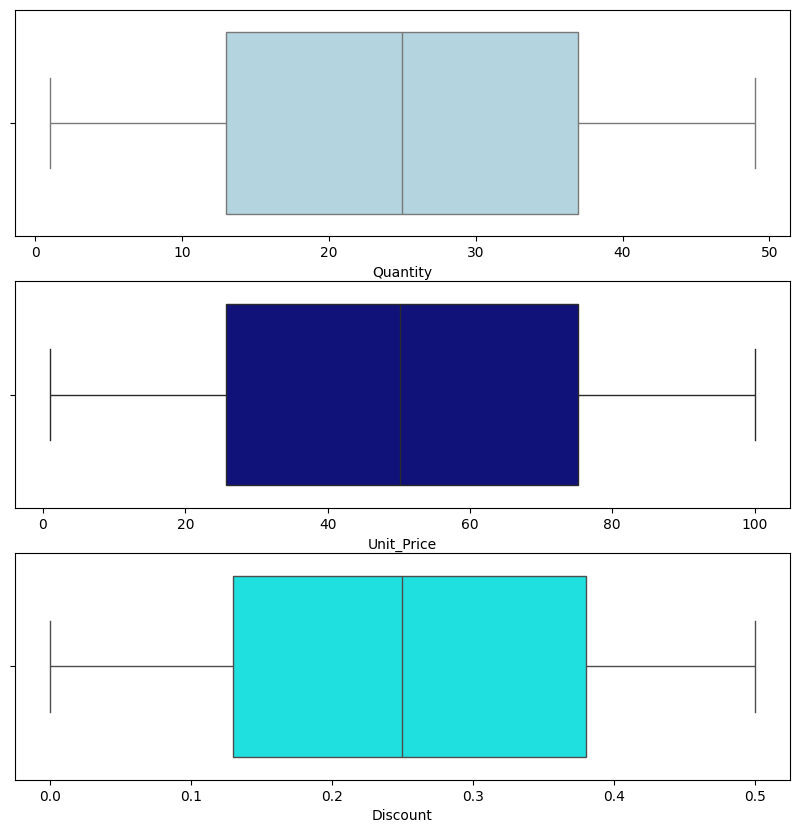

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(10, 10))

sns.boxplot(x = 'Quantity', data = df, ax = axes[0], legend= False, color='lightblue')
sns.boxplot(x = 'Unit_Price', data = df, ax = axes[1], legend= False, color='darkblue')
sns.boxplot(x = 'Discount', data = df, ax = axes[2], legend= False, color='aqua')
plt.show()

#muestra que en las columnas por tratar no hay valores extremos

In [46]:
df[['Quantity', 'Unit_Price', 'Discount']].describe().T[['mean', '50%', 'std']]

,mean,50%,std
Quantity,24.861551,25.00,14.153233
Unit_Price,50.425862,50.12,28.538481
Discount,0.251233,0.25,0.144066


In [ ]:
#Reemplazamos los nulos de las columnas numéricas con la mediana, ya que no hay valores extremos
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Discount'] = df['Discount'].fillna(df['Discount'].median())



In [ ]:
##Reemplazamos los nulos de las columnas numéricas con la mediana y/o media
media_unit_price = df['Unit_Price'].mean()
mediana_unit_price = df['Unit_Price'].median()

In [52]:
df_unit = df['Unit_Price'].reset_index()
df_unit.head()

,index,Unit_Price
0,0,1.71
1,1,41.25
2,2,29.11
3,3,76.68
4,4,NaN


In [ ]:
#Muesrtro DF con valores rellenados en unit_price y sin rellenar.
df_unit['media_unit_price'] = df_unit['Unit_Price'].fillna(media_unit_price)
df_unit['mediana_unit_price'] = df_unit['Unit_Price'].fillna(mediana_unit_price)

In [54]:
df_unit.head()

,index,Unit_Price,media_unit_price,mediana_unit_price
0,0,1.71,1.710000,1.71
1,1,41.25,41.250000,41.25
2,2,29.11,29.110000,29.11
3,3,76.68,76.680000,76.68
4,4,NaN,50.425862,50.12


In [55]:
print(df_unit['media_unit_price'].describe()['std'])
print(df_unit['mediana_unit_price'].describe()['std'])

28.122756683507312
28.122803397462924


In [56]:
df['Unit_Price'] = df['Unit_Price'].fillna(media_unit_price)
#Rellemos los nulos de la columna Unit_Price con la media, ya que es la que menos varianza tiene.

In [57]:
df.isnull().sum()
#Comprobamos que no hay nulos en el dataframe

Invoice_No                0
Stock_Code                0
Description               0
Quantity                  0
Invoice_Date              0
Unit_Price                0
Customer_Id               0
Country                   0
Discount                  0
Payment_Method            0
Shipping_Cost             0
Category                  0
Sales_Channel             0
Return_Status             0
Shipment_Provider         0
Warehouse_Location        0
Order_Priority            0
Year                      0
Month                     0
Day_Week                  0
Week                      0
Quarter                   0
Invoice_Date_str          0
Date                      0
Hour                      0
Shipping_Cost_Category    0
dtype: int64

In [58]:
#guardamos el dataframe sin nulos
df.to_csv('Data/online_sales_sin_nulos.csv', index=False)